In [89]:
# Assignment 2

Matrikelnr.: 2089929

## Imports

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import  Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.metrics import confusion_matrix
import seaborn as sns

warnings.filterwarnings("ignore")

## Überblick und Vorbereitung der Daten

### Import

In [91]:
df_car_price = pd.read_csv('02_Regression_CarPrice.csv')

In [92]:
df_car_price.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


### Encoding

In [93]:
df_car_price.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

Wir sehen einige Spalten vom Typ object, welche wir im nachfolgenden encoden.

In [94]:
# Mapping erstellen für alle nicht-numerischen Werte in den Daten
car_name_mapping = {value: idx for idx, value in enumerate(df_car_price['CarName'].unique())}
fueltype_mapping = {value: idx for idx, value in enumerate(df_car_price['fueltype'].unique())}
aspiration_mapping = {value: idx for idx, value in enumerate(df_car_price['aspiration'].unique())}
doornumber_mapping = {value: idx for idx, value in enumerate(df_car_price['doornumber'].unique())}
carbody_mapping = {value: idx for idx, value in enumerate(df_car_price['carbody'].unique())}
drivewheel_mapping = {value: idx for idx, value in enumerate(df_car_price['drivewheel'].unique())}
enginelocation_mapping = {value: idx for idx, value in enumerate(df_car_price['enginelocation'].unique())}
enginetype_mapping = {value: idx for idx, value in enumerate(df_car_price['enginetype'].unique())}
cylindernumber_mapping = {value: idx for idx, value in enumerate(df_car_price['cylindernumber'].unique())}
fuelsystem_mapping = {value: idx for idx, value in enumerate(df_car_price['fuelsystem'].unique())}

# Spalten encoden
df_car_price['CarName'] = df_car_price['CarName'].replace(car_name_mapping)
df_car_price['fueltype'] = df_car_price['fueltype'].replace(fueltype_mapping)
df_car_price['aspiration'] = df_car_price['aspiration'].replace(aspiration_mapping)
df_car_price['doornumber'] = df_car_price['doornumber'].replace(doornumber_mapping)
df_car_price['carbody'] = df_car_price['carbody'].replace(carbody_mapping)
df_car_price['drivewheel'] = df_car_price['drivewheel'].replace(drivewheel_mapping)
df_car_price['enginelocation'] = df_car_price['enginelocation'].replace(enginelocation_mapping)
df_car_price['enginetype'] = df_car_price['enginetype'].replace(enginetype_mapping)
df_car_price['cylindernumber'] = df_car_price['cylindernumber'].replace(cylindernumber_mapping)
df_car_price['fuelsystem'] = df_car_price['fuelsystem'].replace(fuelsystem_mapping)

In [95]:
df_car_price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,0,0,0,0,0,0,0,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,1,0,0,0,0,0,0,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,2,0,0,0,1,0,0,94.5,...,152,0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,3,0,0,1,2,1,0,99.8,...,109,0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,4,0,0,1,2,2,0,99.4,...,136,0,3.19,3.40,8.0,115,5500,18,22,17450.0


In [96]:
df_car_price.describe()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.00000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,76.448780,0.097561,0.180488,0.560976,1.80000,0.673171,0.014634,98.756585,...,126.907317,1.478049,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,41.346261,0.297446,0.385535,0.497483,0.83666,0.556171,0.120377,6.021776,...,41.642693,2.184113,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,86.600000,...,61.000000,0.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,43.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,94.500000,...,97.000000,0.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,79.000000,0.000000,0.000000,1.000000,2.00000,1.000000,0.000000,97.000000,...,120.000000,1.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,113.000000,0.000000,0.000000,1.000000,2.00000,1.000000,0.000000,102.400000,...,141.000000,1.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,146.000000,1.000000,1.000000,1.000000,4.00000,2.000000,1.000000,120.900000,...,326.000000,7.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Ausreißer
Nun prüfen wir noch auf Ausreißer.

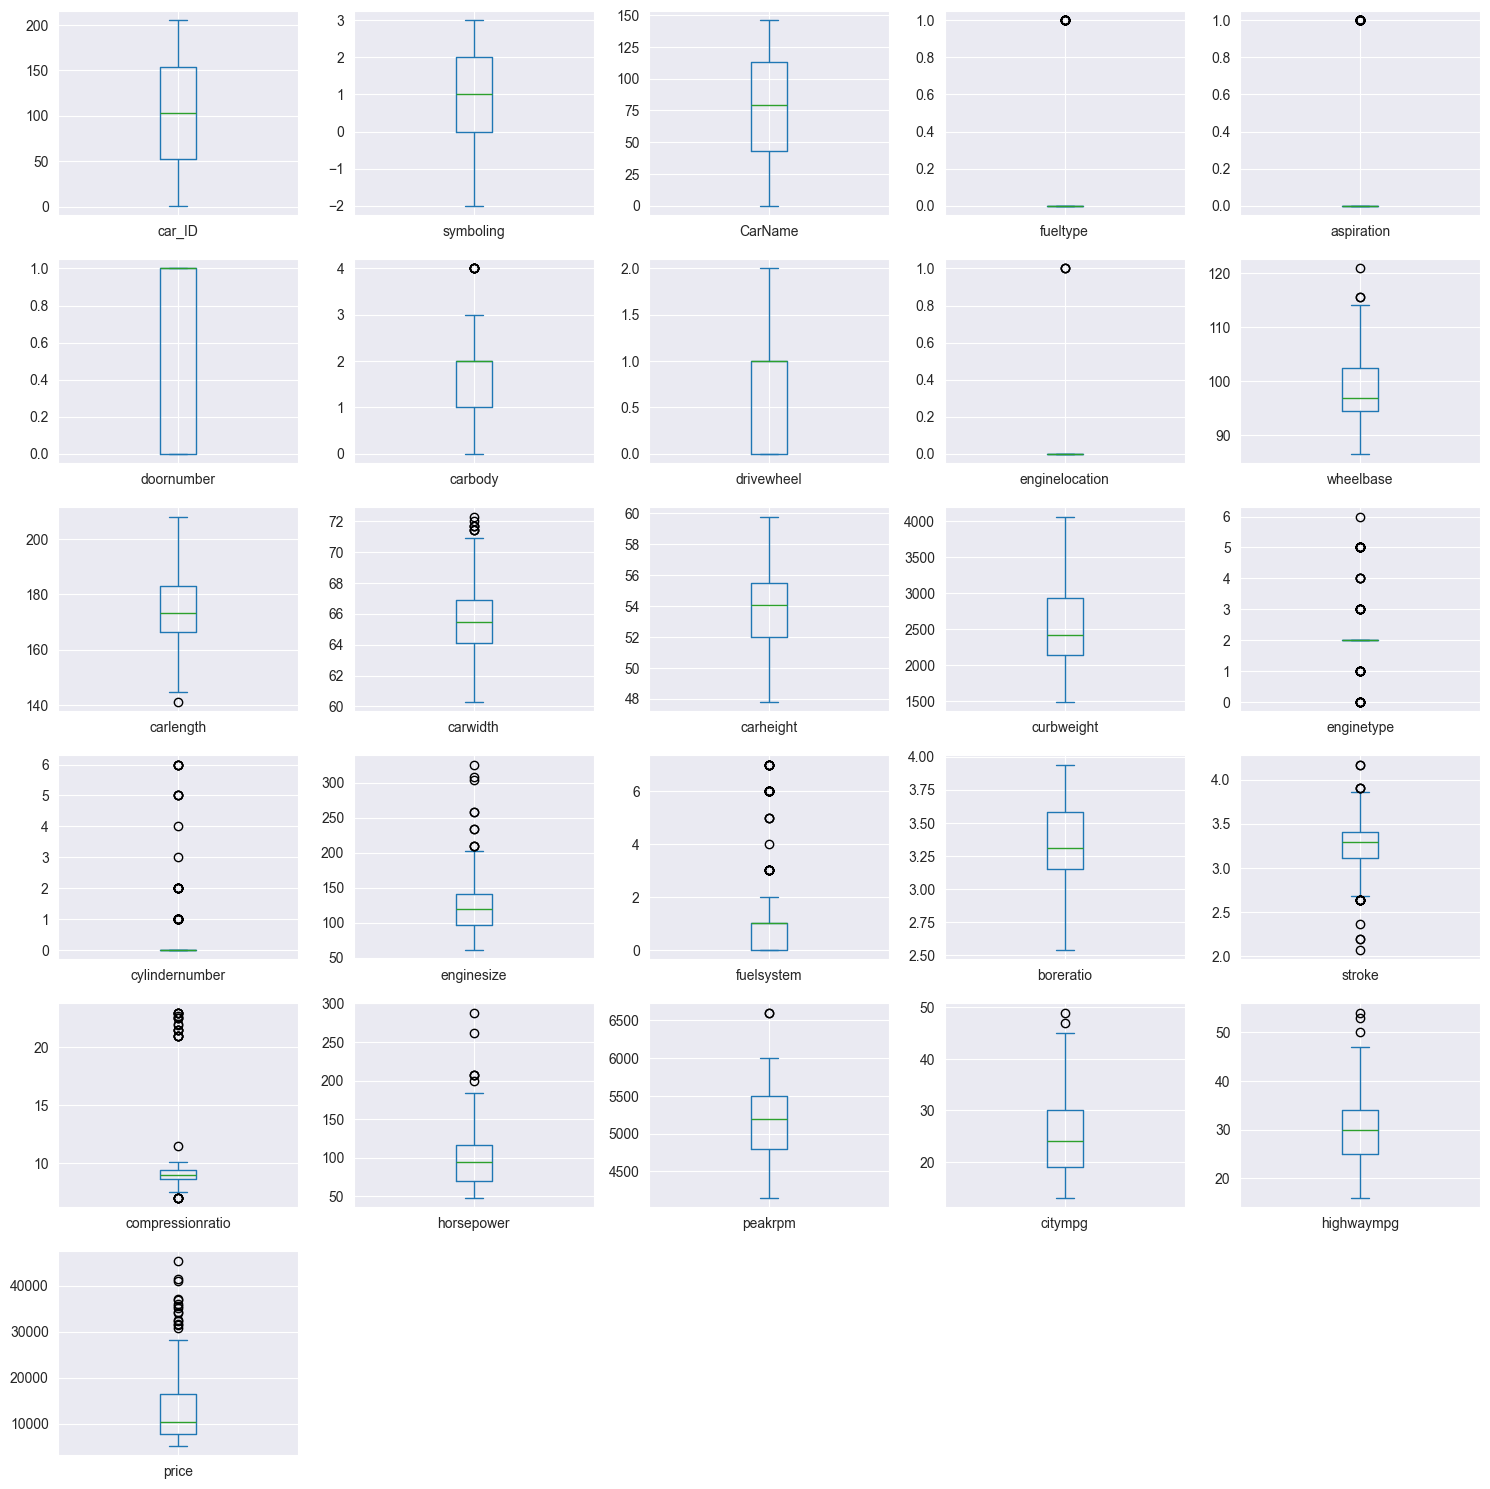

In [97]:
# Erstellen eines Boxplots
df_car_price.plot(kind='box', subplots=True, layout=(6,5), figsize=(15, 15))
plt.tight_layout()
plt.show()

Auf den ersten Blick sind keine Ausreißer zu erkennen. Lediglich bei der Preisspalte sind einige Punkte außerhalb des oberen Whiskers zu erkennen. Es handelt sich jedoch um plausible Autopreise, weshalb wir keine Ausreißer hier entfernen.

## Aufgabe 1
Train and evaluate a multiple regression model. Describe your approach and interpret the performance.

### Trainings- und Testdatensplit

In [98]:
# Entfernen der ID Spalte
del df_car_price['car_ID']

# Aufteilen in Features und Labels
y = df_car_price.price

# Entfernen der Preis Spalte
del df_car_price['price']

x = df_car_price

# Split in Test- und Trainingsdaten
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

### Trainieren des Modells
Als Modell habe ich die lineare Regression ausgewählt.

In [99]:
# Erstellen des linearen Regressionsmodell
lin_reg = LinearRegression()

# Trainieren des Models mit dem Trainingsdatensatz
lin_reg.fit(x_train, y_train)

# Predict auf Trainingsdaten
predictions_train = lin_reg.predict(x_train)

# Predict auf Testdaten
predictions_test = lin_reg.predict(x_test)

### Evaluierung

In [100]:
# Evaluate mean absolute error
print('Mean Absolute Error(MAE):', mean_absolute_error(y_train,predictions_train)) # Evaluate mean squared error
print("Mean Squared Error(MSE):", mean_squared_error(y_train, predictions_train)) # Evaluate root mean squared error
print("Root Mean Squared Error(RMSE):", np.sqrt(mean_squared_error(y_train, predictions_train)))

# Evaluate R2-square
print("R2-Square:",r2_score(y_train, predictions_train))

Mean Absolute Error(MAE): 1628.9932728059766
Mean Squared Error(MSE): 4922162.9096490415
Root Mean Squared Error(RMSE): 2218.594805197434
R2-Square: 0.9192421029330657


Das lineare Regressionsmodell schlägt sich ziemlich gut, mit einem R² von knapp 0,92 erklärt es einen großen Teil der Streuung in unseren Daten. Die Abweichungen zwischen den geschätzten und den tatsächlichen Werten, also der MAE von rund 1629 und der RMSE von etwa 2219, sind zwar nicht zu vernachlässigen, aber sie scheinen in einem vertretbaren Rahmen zu sein.

In [101]:
lin_reg.intercept_, lin_reg.coef_

(-56021.48794133326,
 array([ 2.99097556e+02, -1.85772255e+01, -5.85214436e+03,  2.96609184e+03,
         1.14531352e+03, -6.09257722e+02, -1.07363552e+03,  1.55047646e+04,
         1.27098062e+02, -3.90740069e+01,  4.85682308e+02,  1.76397033e+02,
         2.48100313e+00, -3.45151302e+02,  1.32039795e+03,  8.93121543e+01,
        -2.83616078e+02,  8.01800441e+02, -1.81502025e+03,  4.89029737e+02,
        -1.27317463e+01,  1.30059581e+00, -1.60693760e+02,  1.29359953e+02]))

Der Achsenabschnitt (Intercept) beträgt -56021.49. Auf den ersten Blick könnte es irritieren, dass hier ein negativer Wert zustande kommt, wenn man alle unabhängigen Variablen auf Null setzt. Es ist jedoch wahrscheinlich, dass der hohe negative Achsenabschnitt durch hohe positive Koeffizienten für einige der Variablen ausgeglichen wird, die in der Praxis niemals null sind, wie z.B. die Größe des Motors oder andere Basismerkmale eines Autos, die immer einen bestimmten positiven Wert haben.

Die Koeffizienten (Coefficients) im Array repräsentieren den Einfluss jeder unabhängigen Variablen auf den Preis des Autos. Positive Koeffizienten bedeuten, dass ein Anstieg der jeweiligen Variable zu einem Anstieg des Preises führt, während negative Koeffizienten anzeigen, dass ein Anstieg zu einem Preisrückgang führt.

Zum Beispiel:
- Der Koeffizient von etwa 299 bedeutet, dass für jede Einheitserhöhung dieser Variable der Preis des Autos um etwa 299 Einheiten steigt, wenn alle anderen Variablen gleich bleiben.
- Ein Koeffizient von etwa -5852 für eine andere Variable deutet darauf hin, dass ein Anstieg dieser Variable den Preis um etwa 5852 Einheiten senken würde.
Der relativ große positive Koeffizient von 15504.76 könnte ein Merkmal wie die Motorleistung oder eine Premium-Ausstattung repräsentieren, die den Preis eines Autos erheblich erhöht.

Nun erstellen wir noch einen Scatterplot, der die Beziehung zwischen den wahren Werten (auf der x-Achse) und den Vorhersagen des Modells (auf der y-Achse) darstellt.

Text(0.5, 0, 'True Values')

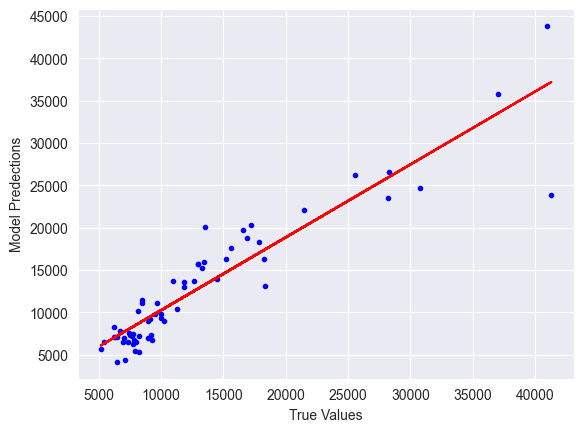

In [103]:
plt.plot(y_test, predictions_test, '.', color='blue')
z = np.polyfit(y_test, predictions_test, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), 'r')

plt.ylabel('Model Predictions')
plt.xlabel('True Values')

Die Modellvorhersagen scheinen insgesamt mit den wahren Werten übereinzustimmen, besonders bei niedrigeren Werten. Das bedeutet, dass das Modell tendenziell genauere Vorhersagen für Autos im niedrigeren bis mittleren Preissegment macht. Bei höheren wahren Werten scheinen die Punkte etwas mehr gestreut zu sein und weichen von der roten Linie ab. Dies deutet darauf hin, dass das Modell bei teureren Autos weniger genau sein könnte. Im hochpreisigen Segment lassen sich außerdem ein paar Ausreißer erkennen.

## Aufgabe 2
Train and evaluate at least two polynomial regression models with different polynomial degrees. Describe your approach and interpret the performance.

### Erstes Modell
Zuerst führen wir eine Rigde Regression mit Polynomen des zweiten Grades durch.

In [105]:
poly_features_2 = PolynomialFeatures(degree=3, include_bias=False) 
X_poly_2 = poly_features_2.fit_transform(x) 

# Train-Test Split
X_train_poly_2, X_test_poly_2, y_train_poly_2, y_test_poly_2 = train_test_split(X_poly_2, y, test_size=0.3, random_state=42)